#Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

#Load Dataset MNIST

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#Visualisasi Data

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

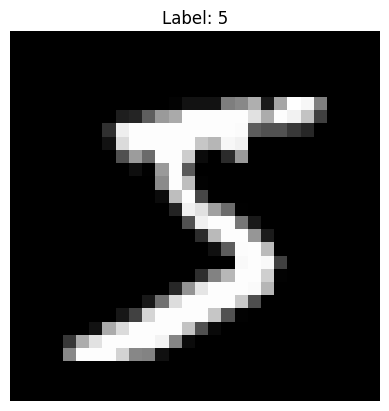

In [3]:
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')


#Preprocessing Data

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [5]:
#Normalisasi Data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:

# One-Hot Encoding Label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#Pembuatan Model Multi-Layer Perceptron (MLP)


In [6]:

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Compile Model

In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:

#Pembuatan Model Multi-Layer Perceptron (MLP)
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

#Compile Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#Training Model
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7729 - loss: 0.7558 - val_accuracy: 0.9465 - val_loss: 0.1816
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9419 - loss: 0.1983 - val_accuracy: 0.9612 - val_loss: 0.1341
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9578 - loss: 0.1423 - val_accuracy: 0.9676 - val_loss: 0.1093
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9647 - loss: 0.1137 - val_accuracy: 0.9692 - val_loss: 0.1015
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9703 - loss: 0.0957 - val_accuracy: 0.9697 - val_loss: 0.1010
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9756 - loss: 0.0816 - val_accuracy: 0.9752 - val_loss: 0.0861
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9787 - loss: 0.0694 - val_accuracy: 0.9738 - val_loss: 0.0883
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9797 - loss: 0.0641 - val_accuracy: 

In [18]:
#Evaluasi Model
# Ensure y_test is one-hot encoded for evaluation
y_test = to_categorical(y_test, 10)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.0864
Test Accuracy: 0.9757999777793884


#Visualisasi Akurasi & Loss

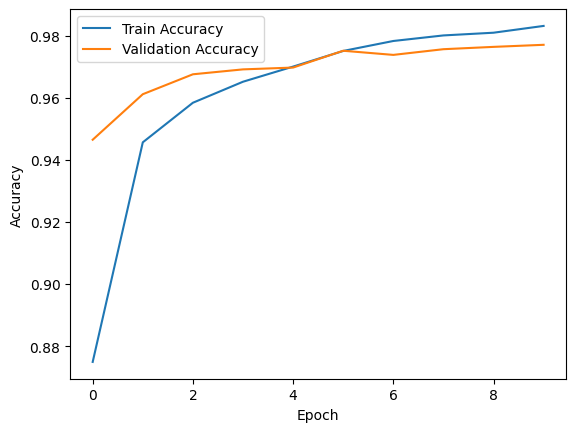

In [19]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()